In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
comfig_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [4]:
model1 = cv2.dnn_DetectionModel(frozen_model, comfig_file)

In [5]:
classLabels = [] ##empty list
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(classLabels[74])

clock


In [8]:
model1.setInputSize(320,320)
model1.setInputScale(1.0/127.5)
model1.setInputMean((127.5,127.5,127.5))
model1.setInputSwapRB(True)

< cv2.dnn.Model 0x138ed1b90>

In [9]:
img = cv2.imread('image8.jpg')

In [10]:
plt.imshow(img)

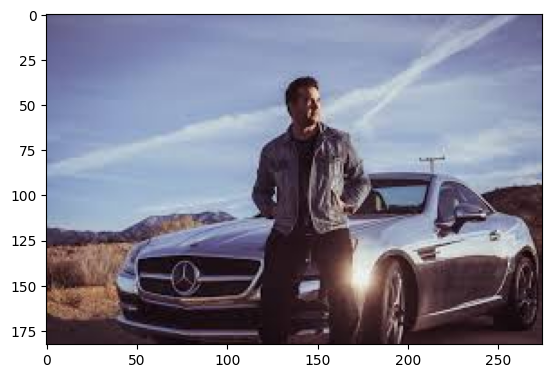

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidece, bbox = model1.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[1 3]


In [14]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes, in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+40,boxes[1]+40), font, fontScale=font_scale,color=(255,0,0),thickness=1 )

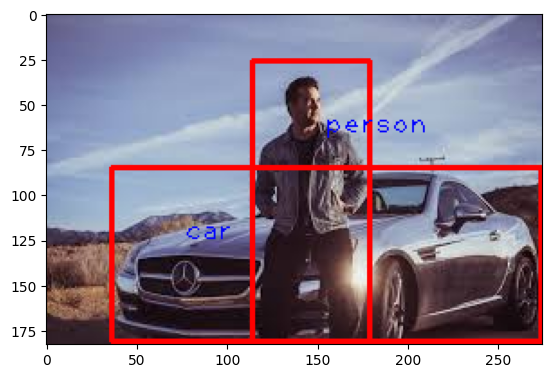

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Video 

In [16]:
import cv2

# Assuming model1 and classLabels are defined elsewhere

cap = cv2.VideoCapture("video.mp4")

## Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model1.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (0, 0, 255), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+40, boxes[1]+40), font, fontScale=font_scale, color=(255, 0, 0), thickness=1)

    cv2.imshow('video.mp4', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
                                    
cap.release()
cv2.destroyAllWindows()


[3 8 3 3 3 3 3 3 6 3]


2024-04-22 13:33:00.944 Python[16260:4764215] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


[3 8 3 3 3 3 3 3 6 3]
[3 8 3 3 3 3 3]
[3 8 3 3 3 6 3]
[3 3 8 3 6 3 3 3]
[3 3 6 3 3 8 3]
[3 3 8 3 3 6 3 3]
[3 8 3 3 6 3 3 3 3 3 3]
[3 3 8 3 3 3 3 6 3 8 3]
[3 3 8 3 3 3 3]
[3 3 3 3 8 3]
[3 3 3 3 8 3 3]
[3 3 3 8 3 3 3]
[3 3 8 3 3 3 3]
[3 3 3 8 3 3]
[3 3 3 3 8 3]
[3 3 3 3 3 8 6 3]
[3 3 3 3 3 3 6 8]
[3 3 3 3 3]
[3 3 3 3 6 3]
[3 3 3 3 3 6]
[3 3 3 3 3 3]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 8 3]
[3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 8]
[3 3 3 3 3 8 3 6 8]
[3 3 3 3 8 3 8 3 6 3]
[3 3 3 3 8 3 8 3 3 3]
[3 3 3 3 8 3 8 3 3]
[3 3 3 3 8 3 3 8 3 6]
[3 3 3 3 8 8 3 3 3 6 3]
[3 3 3 8 3 3 8 3 3 3]
[3 3 3 3 8 3 3 8 6 3]
[3 3 3 3 3 8 8]
[3 3 3 3 3 3 8 8]
[3 3 3 3 3 8 8 3]
[3 3 3 8 3 3 3 6 8]
[3 8 3 6 3 3 3 3]
[3 3 8 3 3 3 6 3 3 3]
[3 3 3 3 8 3 6 3 3]
[3 3 3 3 3 8 3 6]
[3 3 3 3 3 8]
[3 3 3 3 3 6]
[3 3 3 3 8 6 3]
[3 3 3 3 8 6 3 3]
[3 3 3 3 8 3 3 3 3]
[3 3 3 3 3 3 3 8]
[3 3 3 3 3]
[3 3 3 3 6 3 3 8 3]
[3 3 3 3 6 3 8 3 3]
[3 3 6 3 3 3 3 8 3]
[3 3 3 6 3 3 8 3 8 3 3]
[3 3 6 3 3 8 3 8 3 3]
[3 6 3 3 3 3 8 3 3 3]
[3 6 3 3 3 3 8 3 3

[ WARN:0@27.984] global dnn_utils.cpp:166 blobFromImagesWithParamsImpl Red/blue color swapping requires at least three image channels.


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')